#### MU4MES03 - Slender Structures - Plates

*DUVIVIER Valentin*

##### Librairies

In [1]:
import numpy as np
import matplotlib.pyplot as plt

from matplotlib import animation
from IPython.display import HTML
%matplotlib inline

##### Code

In [8]:
## Data

# Material - steel
E  = 210 * 10**9  #[Pa]
nu = 0.3

# Geometry

h  = 1  * 10**-3  #[m]  #beam's thickness

L1 = 10     #[m]  #beam's x1 length
L2 = 1     #[m]  #beam's x2 length

# eps = h / L1 << 1 as aimed

# Force
P  = -10**2          #[N]  #distributed loading  #downwards

## Summation

K1 = 50
K2 = 50

k1 = np.array([k     for k in range(1, K1)])
k2 = np.array([2*k+1 for k in range(K2)])

# ---------------------------------------------

## Solution

M = 100
N = 100

x1 = np.linspace(0, L1, M)
x2 = np.linspace(0, L2, N)

X1, X2 = np.meshgrid(x1, x2)                # work on a 3D meshing (X, Y) aand then Z from calculations

D = E * h**3 / (12 * (1 - nu**2))

##### Displacement

In [9]:
from matplotlib import cm

def display_disp(X1, X2, X3, P, text1, text2):
    fig, ax = plt.subplots(subplot_kw={"projection": "3d"})

    # Plot the surface.
    surf = ax.plot_surface(X1, X2, X3, cmap=cm.coolwarm, linewidth=0, antialiased=False)
    
    ax.set_title(f'{text1} for P = {P} N - {text2}')
    fig.colorbar(surf, shrink=0.5, aspect=5)

    ax.set_xlim(0, L1); ax.set_ylim(0, L2);
    ax.set_xlabel('x'); ax.set_ylabel('y');
    plt.tight_layout()
    
    plt.show()

##### Displacement plate under distributed hydrostatic pressure (areal loading)

In [12]:
X3 = 0                     # Displacement of (and over) the mesh
p3 = 0

for n1 in k1:
    for n2 in k2:
        p_n1_n2 = (-1)**(n1+1) * 8 * P / (n1 * n2 * np.pi**2)  # term due to force (may be areal distributed, punctual, etc)
        p3     += p_n1_n2 * np.sin(np.pi * n1 * X1 / L1) * np.sin(np.pi * n2 * X2 / L2)
        X3     += (1 / (np.pi**4 * D)) * (p_n1_n2 / (((n1/L1)**2 + (n2/L2)**2)**2)) * np.sin(np.pi * n1 * X1 / L1) * np.sin(np.pi * n2 * X2 / L2)  # Displacement along the mesh (X, Y)


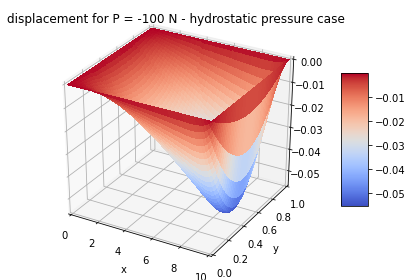

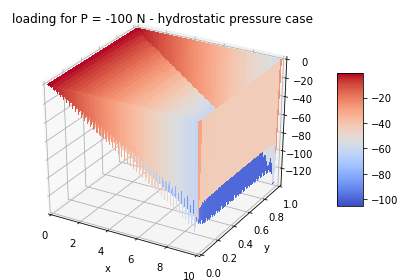

In [13]:
display_disp(X1, X2, X3, P, 'displacement', 'hydrostatic pressure case')
display_disp(X1, X2, p3, P, 'loading', 'hydrostatic pressure case')

$\Rightarrow$ **As a conclusion, one can see on second graph that the force is indeed downwards, depending on x1 only, and of hydrostatic areal type. Moreover, the displacement is as expected null at edges and maximal where the force is max, i.e. at the right here.**